# **IMPORT STATEMENTS**

In [1]:
import re
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# **LOAD THE DATASET**

In [2]:
df=pd.read_csv("/kaggle/input/zomato-bangalore-restaurants/zomato.csv")

In [3]:
df.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [4]:
df.shape

(51717, 17)

# **DROP Unnecessary Columns**

In [5]:
df.drop(["url","address","phone","menu_item"],axis=1,inplace=True)

# **Check for Duplicates**

In [6]:
df.duplicated().sum()

72

In [7]:
df.drop_duplicates(inplace=True)

# **CHECK NULL VALUES**

In [8]:
df.isna().sum()

name                               0
online_order                       0
book_table                         0
rate                            7757
votes                              0
location                          21
rest_type                        227
dish_liked                     28019
cuisines                          45
approx_cost(for two people)      345
reviews_list                       0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

In [9]:
df.head(1)

,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,listed_in(type),listed_in(city)
0,Jalsa,Yes,Yes,4.1/5,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",Buffet,Banashankari


# **Data Cleaning**

# **1) Rate**

In [10]:
df["rate"].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', nan, '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [11]:
def clean(text):
    text=str(text)
    text=re.sub(r"/+","",text) # Remove/5
    text=re.sub("[^0.0-9.0]","",text) #Remove non numeric character such as [NEW,-]
    return text

In [12]:
df["rate"]=df["rate"].apply(clean)
df["rate"]=pd.to_numeric(df["rate"])
df["rate"].unique()

array([4.15, 3.85, 3.75, 3.65, 4.65, 4.05, 4.25, 3.95, 3.15, 3.05, 3.25,
       3.35, 2.85, 4.45, 4.35,  nan, 2.95, 3.55, 2.65, 3.45, 4.55, 2.55,
       2.75, 4.75, 2.45, 2.25, 2.35, 4.85, 4.95, 2.15, 2.05, 1.85])

In [13]:
df.head(1)

,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,listed_in(type),listed_in(city)
0,Jalsa,Yes,Yes,4.15,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",Buffet,Banashankari


# **2) Name**

In [14]:
def clean(text):
    text=str(text)
    text=re.sub("[^a-zA-Z0-9]","",text) #Remove non alphanumeric character
    return text

In [15]:
df["name"]=df["name"].apply(clean)

# **Distribution of Ratings**

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='rate', ylabel='Count'>

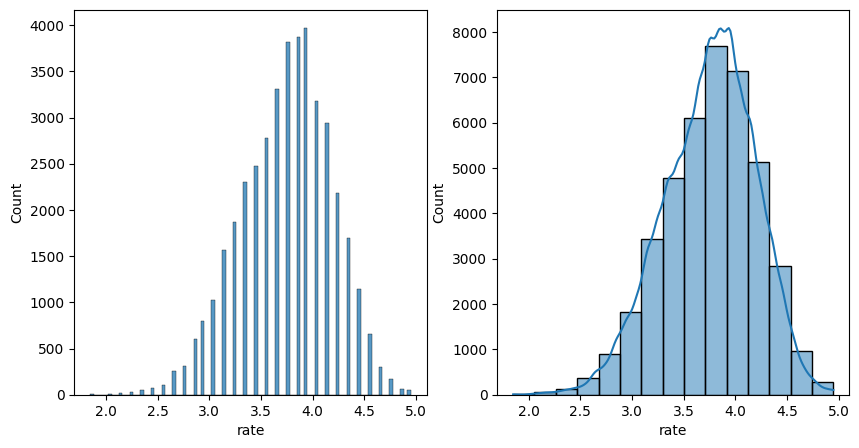

In [16]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.histplot(x=df["rate"])
plt.subplot(1,2,2)
sns.histplot(x=df["rate"],bins=15,kde=True)

In [17]:
from scipy.stats import normaltest
stat,p=normaltest(df["rate"].dropna())
if p>0.05:
    print("It is Normal Distribution")
else:
    print("Not a Normal Distribution")

Not a Normal Distribution


# **Most Rated Restaurants**

In [18]:
X=df["name"].unique()
X.shape

(8723,)

Text(0.5, 1.0, 'TOP Restaurants')

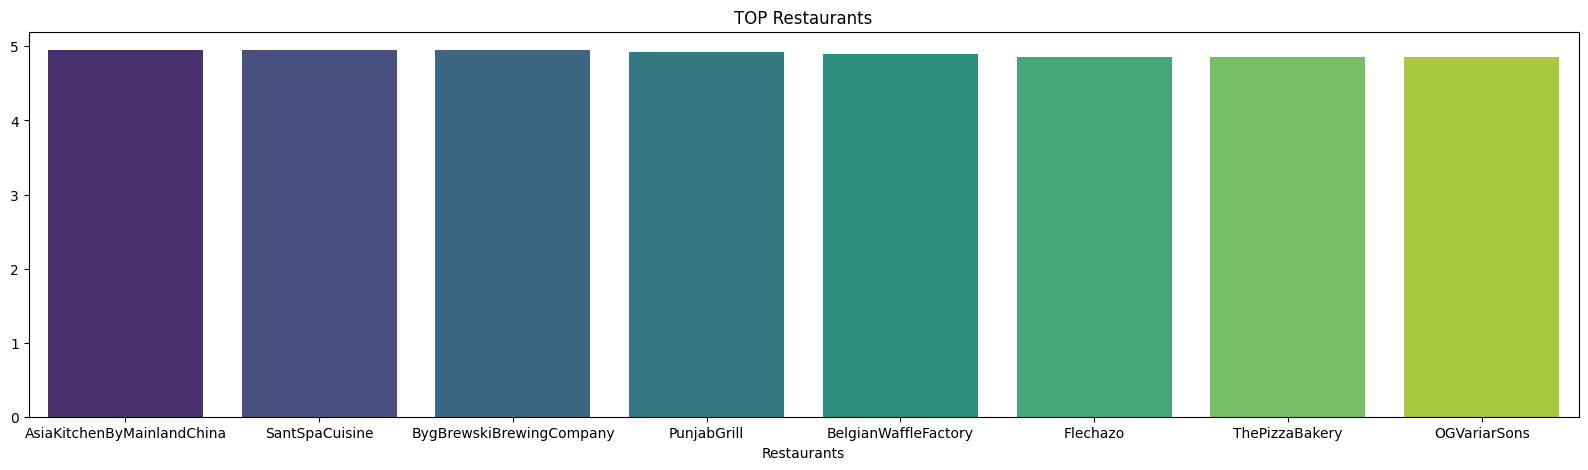

In [19]:
restaurants=df.groupby("name")["rate"].mean().sort_values(ascending=False).dropna()
Top10=restaurants.head(8)
X=Top10.index
Y=Top10.values
plt.figure(figsize=(20,5))
sns.barplot(x=X,y=Y,palette="viridis")
plt.xlabel("Restaurants")
plt.title("TOP Restaurants")

# **Lowest Rated Restaurant**

Text(0.5, 1.0, 'Low Restaurants')

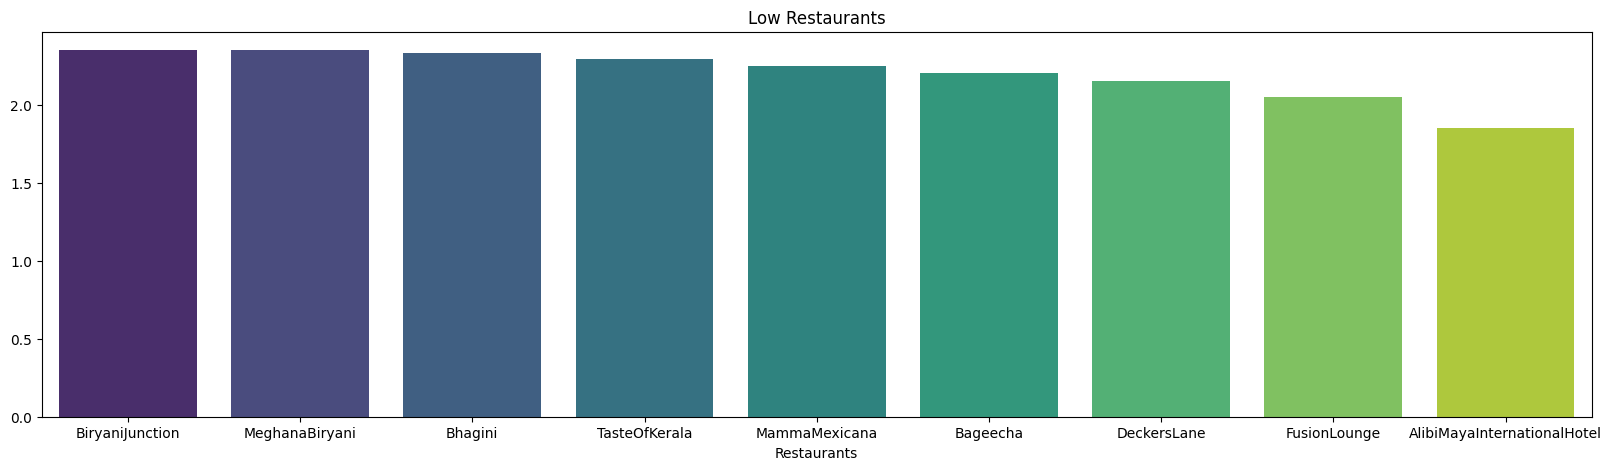

In [20]:
low10=restaurants.tail(9)
X=low10.index
Y=low10.values
plt.figure(figsize=(20,5))
sns.barplot(x=X,y=Y,palette="viridis")
plt.xlabel("Restaurants")
plt.title("Low Restaurants")

# **Number of Outlets in Banglore**

<Axes: xlabel='name'>

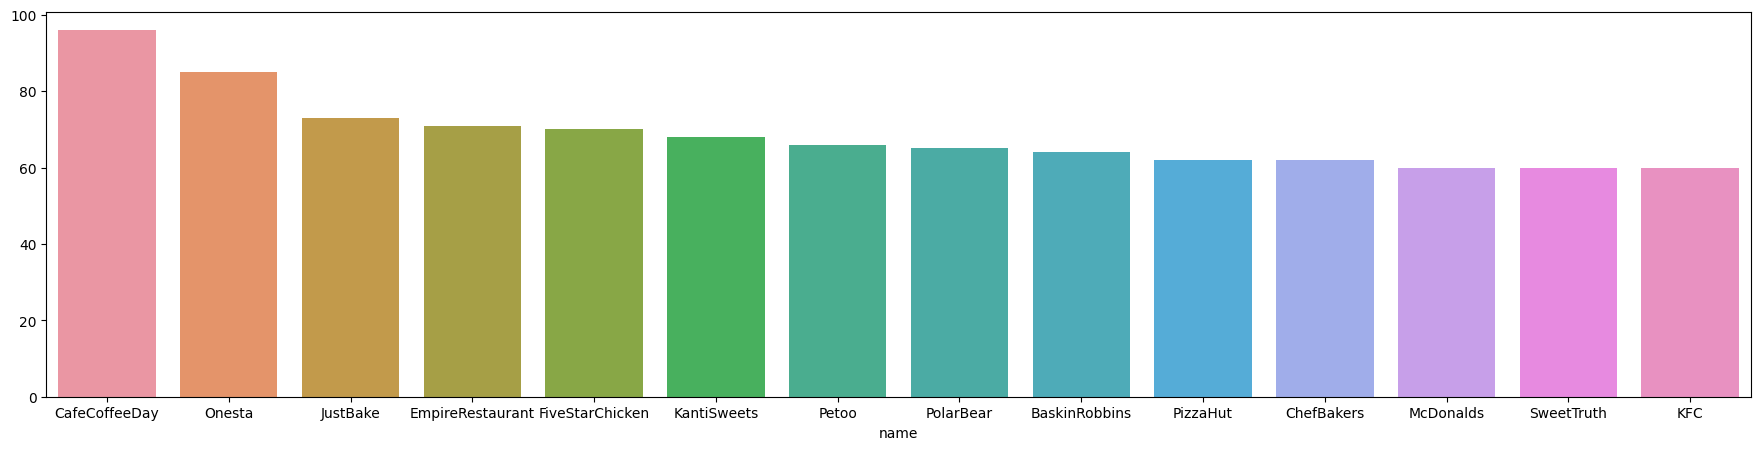

In [21]:
Count_Restaurant=df["name"].value_counts()
Count_Restaurant=Count_Restaurant.head(14)
X=Count_Restaurant.index
Y=Count_Restaurant.values
plt.figure(figsize=(22,5))
sns.barplot(x=X,y=Y)

# **3) Online Orders**

In [22]:
df["online_order"].unique()

array(['Yes', 'No'], dtype=object)

([<matplotlib.patches.Wedge at 0x7aff5e04ebf0>,
 [Text(-0.30145331418166493, 1.0578874700878589, 'Yes'),
  Text(0.3014533141816646, -1.057887470087859, 'No')],
 [Text(-0.1644290804627263, 0.5770295291388321, '58.8%'),
  Text(0.1644290804627261, -0.5770295291388321, '41.2%')])

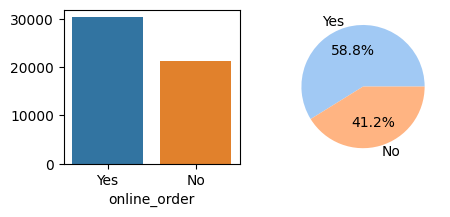

In [23]:
online=df["online_order"].value_counts()
X=online.index
Y=online.values
plt.figure(figsize=(5,2))

plt.subplot(1,2,1)
sns.barplot(x=X,y=Y)

plt.subplot(1,2,2)
plt.pie(Y,colors=sns.color_palette("pastel"),autopct="%1.1f%%",labels=X)

# **Book Table**

([<matplotlib.patches.Wedge at 0x7aff5df05630>,
 [Text(-1.0167437229391834, 0.4198001927867226, 'No'),
  Text(1.0167436836346482, -0.4198002879811384, 'Yes')],
 [Text(-0.5545874852395545, 0.22898192333821227, '87.5%'),
  Text(0.5545874638007171, -0.2289819752624391, '12.5%')])

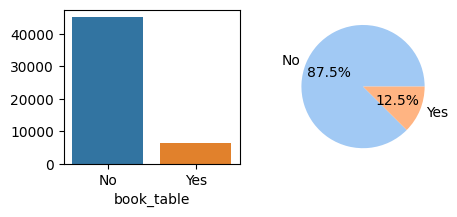

In [24]:
book_table=df["book_table"].value_counts()
X=book_table.index
Y=book_table.values
plt.figure(figsize=(5,2))

plt.subplot(1,2,1)
sns.barplot(x=X,y=Y)

plt.subplot(1,2,2)
plt.pie(Y,colors=sns.color_palette("pastel"),autopct="%1.1f%%",labels=X)

rest_type

In [25]:
df["rest_type"].unique()

array(['Casual Dining', 'Cafe, Casual Dining', 'Quick Bites',
       'Casual Dining, Cafe', 'Cafe', 'Quick Bites, Cafe',
       'Cafe, Quick Bites', 'Delivery', 'Mess', 'Dessert Parlor',
       'Bakery, Dessert Parlor', 'Pub', 'Bakery', 'Takeaway, Delivery',
       'Fine Dining', 'Beverage Shop', 'Sweet Shop', 'Bar',
       'Beverage Shop, Quick Bites', 'Confectionery',
       'Quick Bites, Beverage Shop', 'Dessert Parlor, Sweet Shop',
       'Bakery, Quick Bites', 'Sweet Shop, Quick Bites', 'Kiosk',
       'Food Truck', 'Quick Bites, Dessert Parlor',
       'Beverage Shop, Dessert Parlor', 'Takeaway', 'Pub, Casual Dining',
       'Casual Dining, Bar', 'Dessert Parlor, Beverage Shop',
       'Quick Bites, Bakery', 'Dessert Parlor, Quick Bites',
       'Microbrewery, Casual Dining', 'Lounge', 'Bar, Casual Dining',
       'Food Court', 'Cafe, Bakery', nan, 'Dhaba',
       'Quick Bites, Sweet Shop', 'Microbrewery',
       'Food Court, Quick Bites', 'Pub, Bar', 'Casual Dining, Pub',
      

In [26]:
df["listed_in(type)"].unique()

array(['Buffet', 'Cafes', 'Delivery', 'Desserts', 'Dine-out',
       'Drinks & nightlife', 'Pubs and bars'], dtype=object)

# **Approx_cost(for two people)**

In [27]:
df["approx_cost(for two people)"].unique()

array(['800', '300', '600', '700', '550', '500', '450', '650', '400',
       '900', '200', '750', '150', '850', '100', '1,200', '350', '250',
       '950', '1,000', '1,500', '1,300', '199', '80', '1,100', '160',
       '1,600', '230', '130', '50', '190', '1,700', nan, '1,400', '180',
       '1,350', '2,200', '2,000', '1,800', '1,900', '330', '2,500',
       '2,100', '3,000', '2,800', '3,400', '40', '1,250', '3,500',
       '4,000', '2,400', '2,600', '120', '1,450', '469', '70', '3,200',
       '60', '560', '240', '360', '6,000', '1,050', '2,300', '4,100',
       '5,000', '3,700', '1,650', '2,700', '4,500', '140'], dtype=object)

In [28]:
df["approx_cost(for two people)"]=df["approx_cost(for two people)"].str.replace(",","") #Replace the comma
df["approx_cost(for two people)"]=pd.to_numeric(df["approx_cost(for two people)"])      #Convert to Numeric
df.rename(columns={"approx_cost(for two people)":"Cost2People"},inplace=True)           #Rename the column
df["Cost2People"].unique()

array([ 800.,  300.,  600.,  700.,  550.,  500.,  450.,  650.,  400.,
        900.,  200.,  750.,  150.,  850.,  100., 1200.,  350.,  250.,
        950., 1000., 1500., 1300.,  199.,   80., 1100.,  160., 1600.,
        230.,  130.,   50.,  190., 1700.,   nan, 1400.,  180., 1350.,
       2200., 2000., 1800., 1900.,  330., 2500., 2100., 3000., 2800.,
       3400.,   40., 1250., 3500., 4000., 2400., 2600.,  120., 1450.,
        469.,   70., 3200.,   60.,  560.,  240.,  360., 6000., 1050.,
       2300., 4100., 5000., 3700., 1650., 2700., 4500.,  140.])

# **POPULAR CUSINE**

<Axes: ylabel='cuisines'>

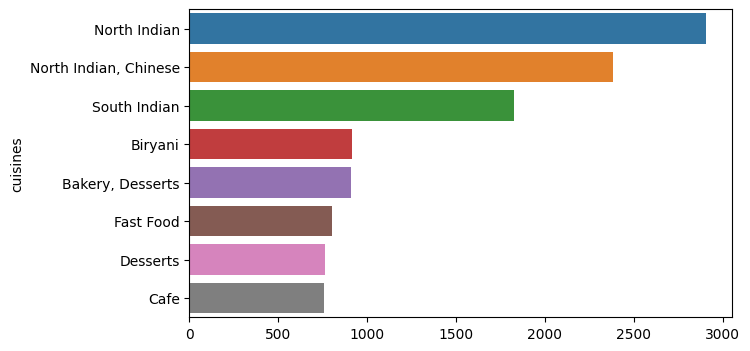

In [29]:
cuisines=df["cuisines"].value_counts().head(8)
X=cuisines.index
Y=cuisines.values
plt.figure(figsize=(7,4))
sns.barplot(x=Y,y=X)

In [30]:
def convertToBoolean(text):
    text=str(text)
    if text=="Yes":
        return 1
    else:
        return 0

df["online_order"]= df["online_order"].apply(convertToBoolean)
df["book_table"]=df["book_table"].apply(convertToBoolean)

In [31]:
df.head(1)

,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,Cost2People,reviews_list,listed_in(type),listed_in(city)
0,Jalsa,1,1,4.15,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800.0,"[('Rated 4.0', 'RATED\n A beautiful place to ...",Buffet,Banashankari


In [32]:
df["listed_in(city)"].unique()

array(['Banashankari', 'Bannerghatta Road', 'Basavanagudi', 'Bellandur',
       'Brigade Road', 'Brookefield', 'BTM', 'Church Street',
       'Electronic City', 'Frazer Town', 'HSR', 'Indiranagar',
       'Jayanagar', 'JP Nagar', 'Kalyan Nagar', 'Kammanahalli',
       'Koramangala 4th Block', 'Koramangala 5th Block',
       'Koramangala 6th Block', 'Koramangala 7th Block', 'Lavelle Road',
       'Malleshwaram', 'Marathahalli', 'MG Road', 'New BEL Road',
       'Old Airport Road', 'Rajajinagar', 'Residency Road',
       'Sarjapur Road', 'Whitefield'], dtype=object)

# **Number of Restraunts area wise**

In [33]:
count_areaWise=df["listed_in(city)"].value_counts()

<Axes: ylabel='listed_in(city)'>

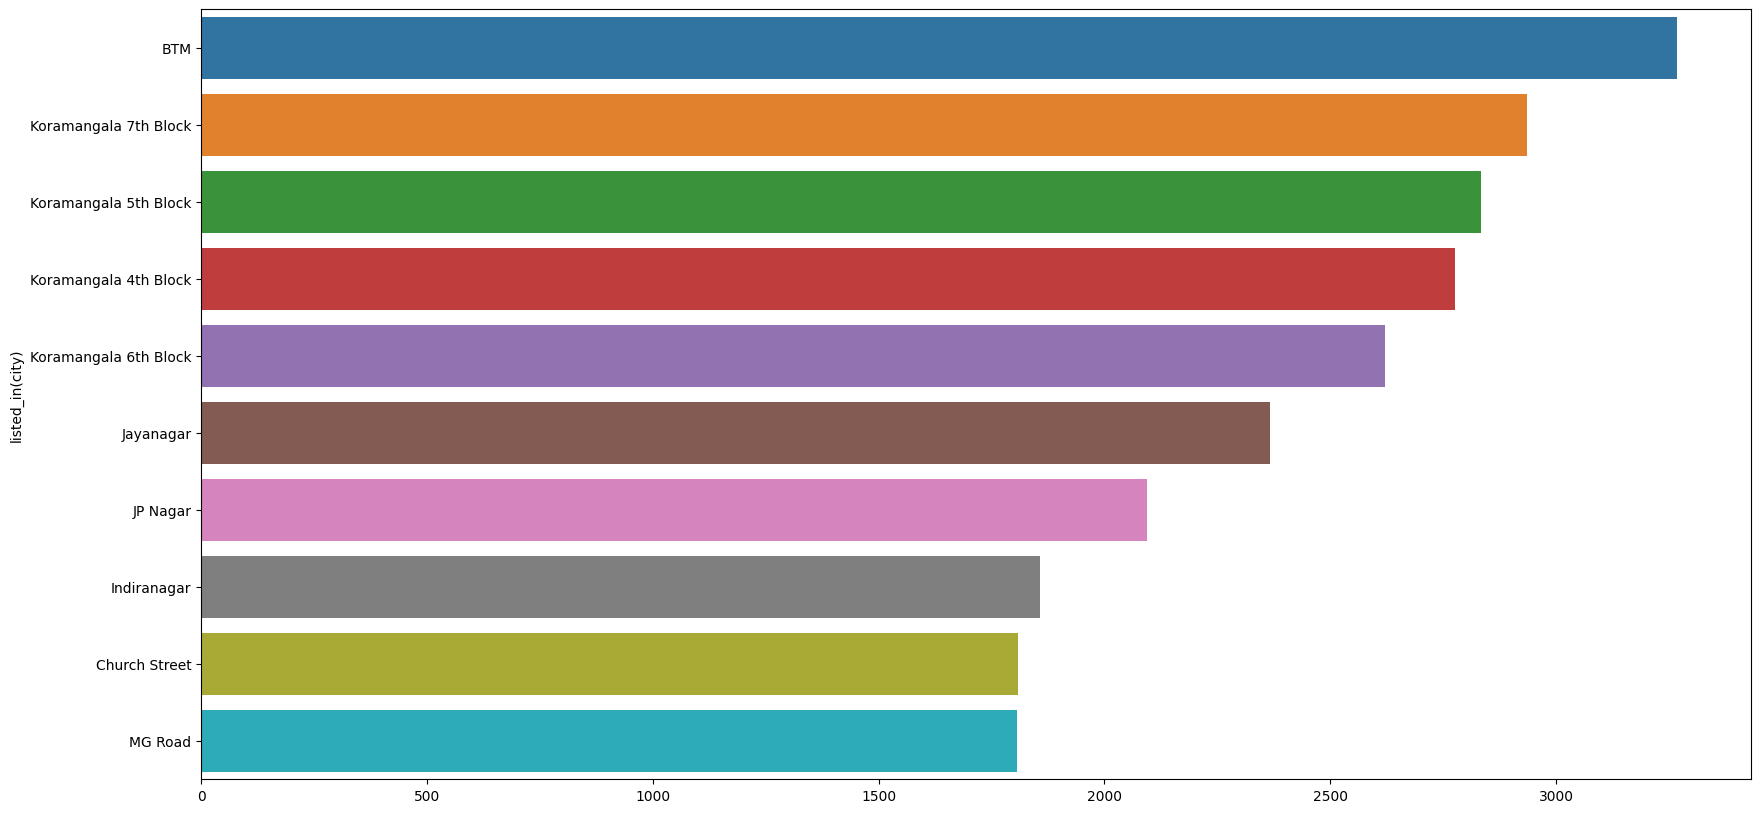

In [34]:
X=count_areaWise.head(10).index
Y=count_areaWise.head(10).values
plt.figure(figsize=(20,10))
sns.barplot(x=Y,y=X)

# **Most Common Type of Restaurant in Bangalore**

<Axes: xlabel='rest_type'>

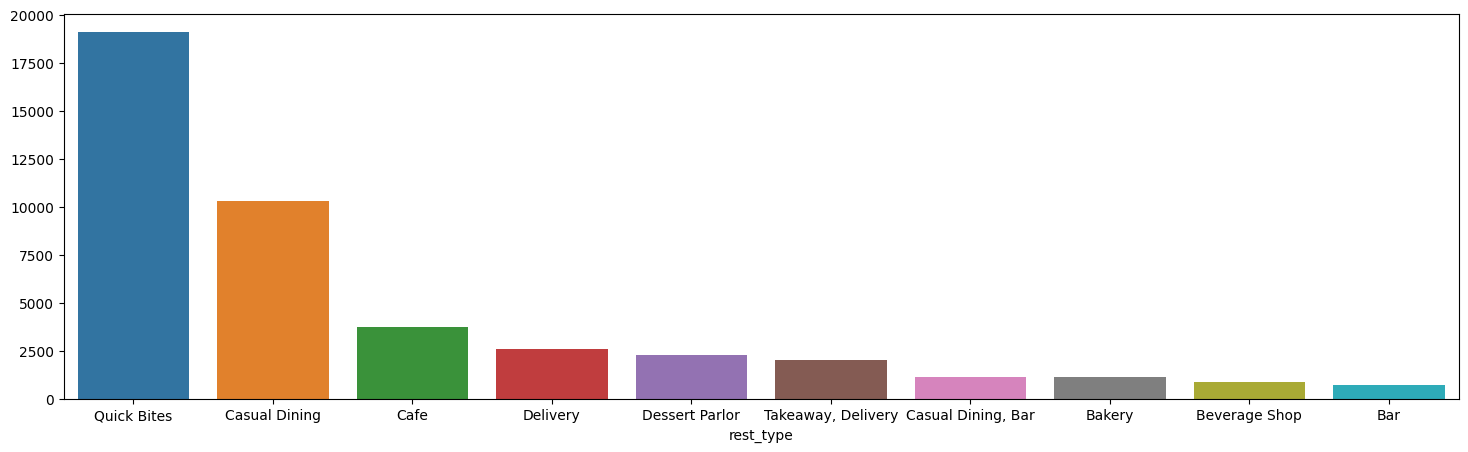

In [35]:
res_type=df["rest_type"].value_counts().head(10)
plt.figure(figsize=(18,5))
X=res_type.index
Y=res_type.values
sns.barplot(x=X,y=Y)

# **Most Liked Dishes**

In [36]:
df.head(1)

,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,Cost2People,reviews_list,listed_in(type),listed_in(city)
0,Jalsa,1,1,4.15,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800.0,"[('Rated 4.0', 'RATED\n A beautiful place to ...",Buffet,Banashankari


In [37]:
df["dish_liked"].unique()

array(['Pasta, Lunch Buffet, Masala Papad, Paneer Lajawab, Tomato Shorba, Dum Biryani, Sweet Corn Soup',
       'Momos, Lunch Buffet, Chocolate Nirvana, Thai Green Curry, Paneer Tikka, Dum Biryani, Chicken Biryani',
       'Churros, Cannelloni, Minestrone Soup, Hot Chocolate, Pink Sauce Pasta, Salsa, Veg Supreme Pizza',
       ...,
       'Noodles, Chicken Noodle, Momos, American Chopsuey, Salad, Manchow Soup, Manchurian',
       'Chicken Quesadilla, Naan, Breakfast Buffet, Cheesecake, Cocktails, Lunch Buffet, Biryani',
       'Biryani, Andhra Meal'], dtype=object)

<Axes: xlabel='dish_liked'>

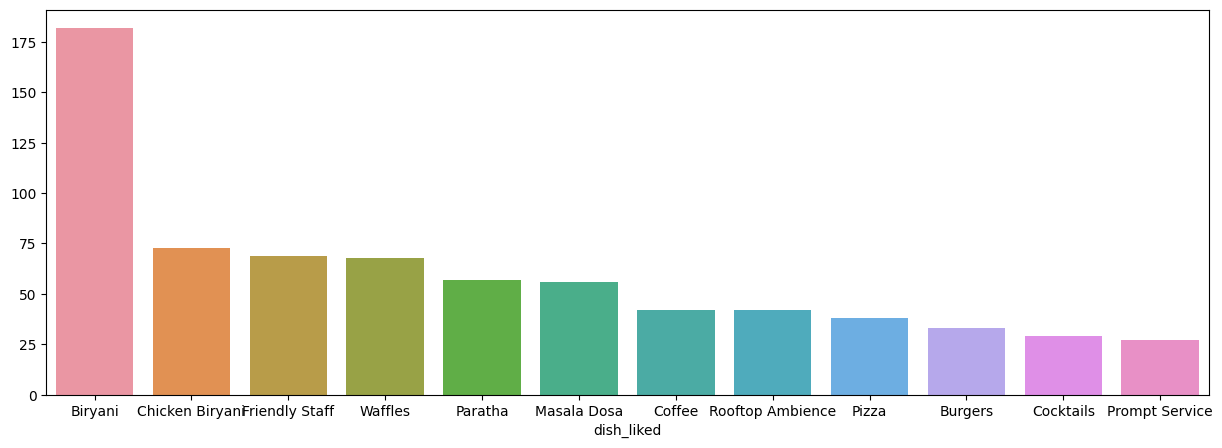

In [38]:
dish=df["dish_liked"].value_counts().head(12)
X=dish.index
Y=dish.values
plt.figure(figsize=(15,5))
sns.barplot(x=X,y=Y)

# **CORELATION MATRIX**

<Axes: >

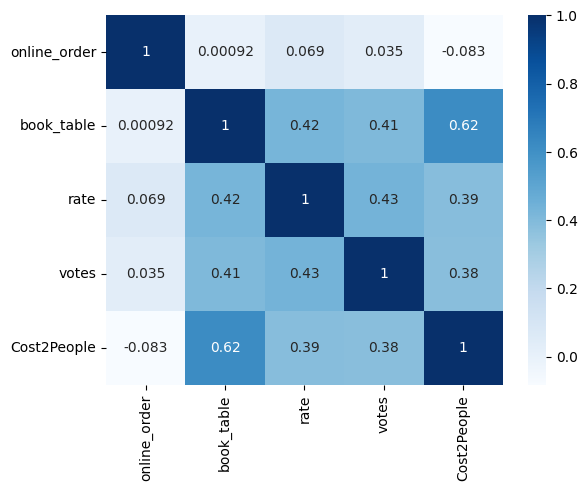

In [39]:
cr=df.corr(numeric_only=True)
sns.heatmap(cr,annot=True,cmap="Blues")